<h2>Assignment 1 - Part 1: Linear Regression on Boston Housing Data</h2>

You're asked to do the following tasks to predict boston house price:
<lu>
<li>Use scikit-learn</li>
<li>Implement analytical solution (normal equation) to obtain weights</li>
<li>Implement numerical solution (gradient descent) to obtain weights</li>
</lu>
    Note: the accuracy of your implementations should be close to that of a linear model from scikit-learn

In addition, you need to show the resulting intercept and coefficents, calculate errors on training dataset and testing dataset, and plot a figure to show your predictions and real prices on the testing dataset. 

In [0]:
# The modules we're going to use
from __future__ import print_function
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt

# When you execute a code to plot with a simple SHIFT-ENTER, the plot will be shown directly under the code cell
%matplotlib inline

In [0]:
# Load data from scikit-learn, which returns (data, target)
# note: if you call "boston = load_boston()", it returns a dictionary-like object
data, target = datasets.load_boston(True)
# Split the data into two parts: training data and testing data
train_data,test_data,train_target,test_target = train_test_split(data,(target[:, np.newaxis]), test_size=0.2, random_state=42)

<h4>Use scikit-learn library in the following cell</h4>

Intercept: 
 [30.24675099]

Coefficients: 
 [[-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
  -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
   2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
  -5.08571424e-01]]

Training Error:
 [[10.82070638]]
Testing Error:
 [[12.14555974]]



Text(0, 0.5, 'Predicted price')

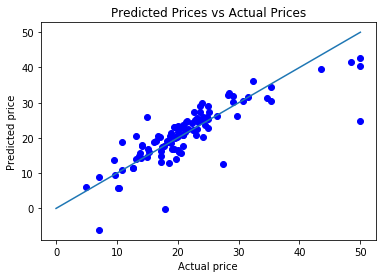

In [8]:
# Task 1-1: use linear regression in sklearn
model = linear_model.LinearRegression() # create a new linear regression model object
model.fit(train_data, train_target)     # train the model to fit our training data and target

# Task 1-2: show intercept and coefficents
print("Intercept: \n", model.intercept_) # print the intercept of the model (bias)
print()
print("Coefficients: \n", model.coef_)   # print the coefficients of the model (weights)
print()

# Task 1-3: show errors on training dataset and testing dataset
def mean_squared_error(actual, predicted):      # method to calculate MSE
    return 1/(2*actual.shape[0])*((actual-predicted).T.dot(actual-predicted))
  
train_pred = model.predict(train_data)                      # predict prices from training data
train_error = mean_squared_error(train_target, train_pred)  # calc error from training data predictions
print("Training Error:\n", train_error)                     # print training data prediction error
test_pred = model.predict(test_data)                        # predict prices from testing data
test_error = mean_squared_error(test_target, test_pred)     # calc error from testing data predictions
print("Testing Error:\n", test_error)                       # print testing data prediction error
print()

# Task 1-4: show plot a figure to show your predictions and real prices on the testing dataset
plt.title("Predicted Prices vs Actual Prices")   # set title for figure
plt.scatter(test_target, test_pred, color='b')   # plot predicted prices over actual prices
plt.plot([0, 50], [0, 50])                       # plot y=x for reference
plt.xlabel('Actual price')                       # set x-axis label
plt.ylabel('Predicted price')                    # set y-axis label

<h4>Use analytical solution (normal equation) to perform linear regression in the following cell</h4>

Intercept:
 [30.24675099]

Coefficients:
 [[-1.13055924e-01]
 [ 3.01104641e-02]
 [ 4.03807204e-02]
 [ 2.78443820e+00]
 [-1.72026334e+01]
 [ 4.43883520e+00]
 [-6.29636221e-03]
 [-1.44786537e+00]
 [ 2.62429736e-01]
 [-1.06467863e-02]
 [-9.15456240e-01]
 [ 1.23513347e-02]
 [-5.08571424e-01]]

Training error:
 [[10.82070638]]
Testing error:
 [[12.14555974]]



Text(0, 0.5, 'Predicted price')

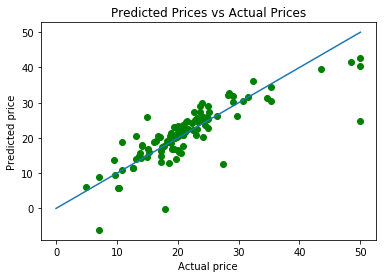

In [9]:
# Task 2-1: Implement a function solving normal equation 
# Inputs: Training data and  training label
# Output: Weights
def myNormalEqualFun(X,y):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y) # implement analytical solution to find optimal weights
    
# Task 2-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    return X.dot(w) # get dot product of feature values and weights to get predictions

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myNormalEqual to train the model and get weights
w = myNormalEqualFun(train_data_intercept,train_target)

# Task 2-3: show intercept and coefficents
print("Intercept:\n", w[0])     # print the intercept (bias)
print()
print("Coefficients:\n", w[1:]) # print coefficients (weights)
print()

# Task 2-4: show errors on training dataset and testing dataset
def mean_squared_error(actual, predicted):    # method to calculate MSE
    return 1/(2*actual.shape[0])*((actual-predicted).T.dot(actual-predicted))
  
train_pred = myPredictFun(train_data_intercept, w)         # store predictions from training dataset
train_error = mean_squared_error(train_target, train_pred) # calc MSE for predictions from training data
print("Training error:\n", train_error)                    # print error from training dataset predictions
test_pred = myPredictFun(test_data_intercept, w)           # store predictions from testing dataset
test_error = mean_squared_error(test_target, test_pred)    # calc MSE for predictions from testing dataset
print("Testing error:\n", test_error)                      # print error from testing dataset predictions
print()

# Task 2-5: show plot a figure to show your predictions and real prices on the testing dataset
plt.title("Predicted Prices vs Actual Prices")  # set title of figure
plt.scatter(test_target, test_pred, color='g')  # plot price predictions over actual prices
plt.plot([0, 50], [0, 50])                      # plot line y=x for reference
plt.xlabel('Actual price')                      # set x-axis label
plt.ylabel('Predicted price')                   # set y-axis label

<h4>Use numerical solution (gradient descent) to perform linear regression in the following cell</h4>

Intercept:
 [22.79653465]

Coefficients:
 [[-0.96991893]
 [ 0.62647406]
 [ 0.16103765]
 [ 0.73542364]
 [-1.96479508]
 [ 3.18060781]
 [-0.18737117]
 [-3.02842217]
 [ 1.89746071]
 [-1.38838366]
 [-2.01868102]
 [ 1.1289832 ]
 [-3.59772468]]

Training error:
 [[10.83033976]]
Testing error:
 [[12.26636545]]



Text(0, 0.5, 'Predicted price')

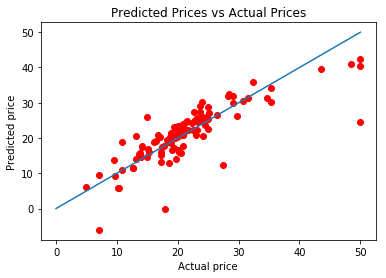

In [15]:
# Feature scaling
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

# Task 3-1: Implement a function performing gradient descent
# Inputs: Training data, training label, leaerning rate, number of iterations
# Output: Weights
def myGradientDescentFun(X,y,learning_rate,numItrs):
    w = np.random.rand(X.shape[1], 1)  # initialize weights to random values
    for i in range(numItrs):           # adjust weights for numItrs iterations
        w = w + learning_rate*(1/X.shape[0])*X.T.dot(y - X.dot(w)) # adjust w based on the error and the learning rate
    return w     # return the revised weights

# Task 3-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    return X.dot(w)    # get predictions from dot product of feature values and weights

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myGradientDescentFun to train the model and get weights
# Note: you need to figure out good learning rate value and the number of iterations
w = myGradientDescentFun(train_data_intercept,train_target,.01, 2500)

# Task 3-3: show intercept and coefficents
print('Intercept:\n', w[0])        # print intercept (bias) for scaled features
print()
print('Coefficients:\n', w[1:])   # print coefficients (weights) for scaled features
print()

# Task 3-4: show errors on training dataset and testing dataset
def mean_squared_error(actual, predicted):     # method to calc MSE
    return 1/(2*actual.shape[0])*((actual-predicted).T.dot(actual-predicted))
  
train_pred = myPredictFun(train_data_intercept, w)         # store training data price predictions
train_error = mean_squared_error(train_target, train_pred) # calc MSE for training data predictions
print('Training error:\n', train_error)                    # print training data prediction error

test_pred = myPredictFun(test_data_intercept, w)           # store testing data price predictions
test_error = mean_squared_error(test_target, test_pred)    # calc MSE for testing data predictions
print('Testing error:\n', test_error)                      # print testing data prediction error
print()

# Task 3-5: show plot a figure to show your predictions and real prices on the testing dataset
plt.title("Predicted Prices vs Actual Prices")   # add title to figure
plt.scatter(test_target, test_pred, color='r')   # plot price predictions for test data over actual prices
plt.plot([0, 50], [0, 50])                       # plot y=x for reference
plt.xlabel('Actual price')                       # add x-axis label
plt.ylabel('Predicted price')                    # add y-axis label